# Confusion Matrix and viewinng Miscalssification

In [38]:
from keras.datasets import mnist
from keras.layers import Dropout,Dense,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential
from keras.utils import np_utils
import keras
from keras import backend as K
from keras.optimizers import Adam

#Training parameters
batch_size = 128
epochs = 25

# Load the mnist dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#Let's Store the number of rows and columns
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]

#Getting our data in the right 'shape' needed for keras
# we need to ass a 4th dimension to our data therby changing 
# Our original image shape of (60000,28,28) to (60000,28,28,1)

X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)

#Store the shape of single image
input_shape = (img_rows,img_cols,1) 

#change our image type to float 32 data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalising the data i.e changing range from (0 to 255) to (0 to 1)
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print('train samples', X_train.shape[0])
print('test samples',X_test.shape[0])
print("ytrain before hot encoding",y_train)

#Now we one hot encode
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print("After one hot encoded y_train",y_train)

#Counting nummber of columns in our hot encoded matrix
print("Number of classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = X_train.shape[1] * X_train.shape[2]

print("Number of pixels",num_pixels)



X_train shape: (60000, 28, 28, 1)
train samples 60000
test samples 10000
ytrain before hot encoding [5 0 4 ... 5 6 8]
After one hot encoded y_train [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Number of classes: 10
Number of pixels 784


In [39]:
#creating model
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu',
                 input_shape = input_shape))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(lr=0.01),
             metrics = ['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

## Fitting our model

In [40]:
history = model.fit(X_train,y_train,batch_size=batch_size,
                   epochs = epochs , verbose =1, 
                   validation_data = (X_test,y_test))

score = model.evaluate(X_test,y_test,verbose = 1)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Epoch 1/25
469/469 [==============================] - 9s 17ms/step - loss: 0.3951 - accuracy: 0.8718 - val_loss: 0.0572 - val_accuracy: 0.9809
Epoch 2/25
469/469 [==============================] - 8s 18ms/step - loss: 0.1189 - accuracy: 0.9651 - val_loss: 0.0474 - val_accuracy: 0.9834
Epoch 3/25
469/469 [==============================] - 8s 18ms/step - loss: 0.0941 - accuracy: 0.9726 - val_loss: 0.0469 - val_accuracy: 0.9851
Epoch 4/25
469/469 [==============================] - 9s 18ms/step - loss: 0.0964 - accuracy: 0.9706 - val_loss: 0.0511 - val_accuracy: 0.9851
Epoch 5/25
469/469 [==============================] - 9s 18ms/step - loss: 0.0954 - accuracy: 0.9729 - val_loss: 0.0477 - val_accuracy: 0.9867
Epoch 6/25
469/469 [==============================] - 9s 19ms/step - loss: 0.0837 - accuracy: 0.9762 - val_loss: 0.0428 - val_accuracy: 0.9877
Epoch 7/25
469/469 [==============================] - 10s 21ms/step - loss: 0.0821 - accuracy: 0.9763 - val_loss: 0.0422 - val_accuracy: 0.989

#### Let's save our history file

In [41]:
import pickle

pickle_out = open("MNIST_history.pickle","wb")
pickle.dump(history.history,pickle_out)
pickle_out.close()

#### Loading out saved history

In [42]:
pickle_in = open("mNIST_history.pickle","rb")
saved_history = pickle.load(pickle_in)
print(saved_history)

{'loss': [0.21357305347919464, 0.11734391003847122, 0.09670596569776535, 0.09713263064622879, 0.0942092314362526, 0.0856902003288269, 0.08388576656579971, 0.08391018956899643, 0.07910676300525665, 0.08483263105154037, 0.07921048253774643, 0.08535825461149216, 0.07211515307426453, 0.07394721359014511, 0.08247341215610504, 0.07004396617412567, 0.0673382431268692, 0.07314438372850418, 0.06923609972000122, 0.07898248732089996, 0.07555738091468811, 0.0642433911561966, 0.06844309717416763, 0.0760524570941925, 0.07419527322053909], 'accuracy': [0.9344000220298767, 0.9660333395004272, 0.9721999764442444, 0.9706833362579346, 0.972683310508728, 0.9757833480834961, 0.9762833118438721, 0.9761333465576172, 0.977483332157135, 0.9754999876022339, 0.977400004863739, 0.9758166670799255, 0.9793166518211365, 0.9787166714668274, 0.9772166609764099, 0.980816662311554, 0.981166660785675, 0.9802166819572449, 0.9811999797821045, 0.9787833094596863, 0.9800333380699158, 0.982200026512146, 0.9815333485603333, 0.

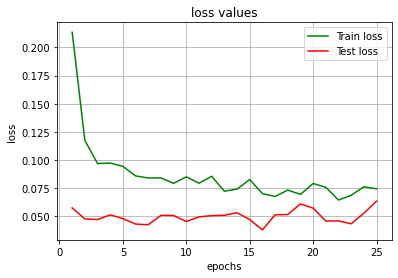

In [56]:
# plotting the loss graph
import matplotlib.pyplot as plt

Train_loss_values = history.history['loss']
Test_loss_values = history.history['val_loss']
epochs = range(1,len(Train_loss_values)+1)

plt.plot(epochs,Train_loss_values,'g',label='Train loss')
plt.plot(epochs,Test_loss_values,'r',label='Test loss')
plt.title("loss values")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()






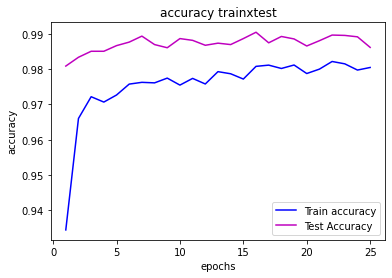

In [61]:
Train_accuracy = history.history['accuracy']
Test_accuracy = history.history['val_accuracy']

epochs = range(1,len(Train_accuracy)+1)

plt.plot(epochs,Train_accuracy,'b',label = 'Train accuracy')
plt.plot(epochs,Test_accuracy,'m',label='Test Accuracy')

plt.legend()
plt.title('accuracy trainxtest')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [43]:
model.save("Confusion_matrix1.h5")

In [44]:
from keras.models import load_model
classifier = load_model("Confusion_matrix1.h5")

#### Now let's display our confusion matrix and classification report

In [68]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

y_pred = np.argmax(model.predict(X_test),axis = -1)

print(classification_report(np.argmax(y_test,axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 976    0    0    0    0    0    2    1    1    0]
 [   1 1126    3    3    0    0    2    0    0    0]
 [   1    0 1025    1    1    0    0    4    0    0]
 [   0    1    1 1004    0    4    0    0    0    0]
 [   0    0    0    0  966   

### Display our misclassified data

In [72]:
#loading the mnist dataset

(X_train,y_train),(X_test,y_test) = mnist.load_data()

# Use numpy to create an array that stores a value of 1 when a misclassification occurs
# we need to compare this y_test with y_pred to find out misclassified data
# np.absolute does this task of comapring
#

result = np.absolute(y_test - y_pred)
result_indices = np.nonzero(result>0) #nonzero fxn returns the indices of the elements that are non zero

#Display the indices of misclassification
print ("Indices of misclassification are :\n\n",result_indices)

Indices of misclassification are :

 (array([ 151,  247,  259,  320,  340,  543,  582,  659,  674,  684,  726,
        740,  938,  947,  956,  965, 1014, 1033, 1039, 1112, 1182, 1202,
       1226, 1232, 1247, 1260, 1326, 1364, 1414, 1522, 1530, 1549, 1559,
       1709, 1737, 1754, 1790, 1878, 1903, 2018, 2043, 2053, 2070, 2093,
       2098, 2129, 2130, 2135, 2225, 2293, 2414, 2488, 2597, 2654, 2896,
       2927, 2939, 2953, 2972, 2995, 3005, 3030, 3060, 3073, 3206, 3422,
       3503, 3520, 3558, 3597, 3629, 3726, 3727, 3767, 3780, 3794, 3808,
       3853, 3906, 3941, 4007, 4075, 4078, 4176, 4238, 4289, 4382, 4443,
       4507, 4639, 4690, 4699, 4740, 4761, 4807, 4837, 4838, 4860, 4956,
       5331, 5634, 5676, 5887, 5937, 6173, 6505, 6568, 6571, 6572, 6576,
       6597, 6625, 6641, 6651, 6783, 7049, 7432, 7434, 7915, 7928, 8246,
       8316, 8408, 8527, 9009, 9015, 9019, 9024, 9280, 9505, 9587, 9620,
       9638, 9642, 9679, 9692, 9729, 9922], dtype=int64),)


## Displaying the misclassifiations

In [98]:
import cv2

def draw_test(name,pred,input_im,true_label):
    BLACK = [0,255,255]
    expanded_image = cv2.copyMakeBorder(input_im,0,0,0,imageL.shape[0]*2,cv2.BORDER_CONSTANT,value = BLACK)
    expanded_image = cv2.cvtColor(expanded_image,cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image,str(pred),(152,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,255,0),2)
    cv2.putText(expanded_image,str(true_label),(250,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,0,255),2)
    cv2.imshow(name,expanded_image)
    

for i in range(0,10):
    
    input_im = X_test[result_indices[0][i]]
    print("y_test[result_indices[0][i]] are :\n\n",y_test[result_indices[0][i]])
    imageL = cv2.resize(input_im,None,fx=4,fy=4,interpolation=cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)
    
    #Get prediction
    res = str(np.argmax(model.predict(input_im,1,verbose=0)[0]))
    draw_test("predictions",res,imageL,y_test[result_indices[0][i]])
    cv2.waitKey(0)
    
    
cv2.destroyAllWindows()
    


y_test[result_indices[0][i]] are :

 9
y_test[result_indices[0][i]] are :

 4
y_test[result_indices[0][i]] are :

 6
y_test[result_indices[0][i]] are :

 9
y_test[result_indices[0][i]] are :

 5
y_test[result_indices[0][i]] are :

 8
y_test[result_indices[0][i]] are :

 8
y_test[result_indices[0][i]] are :

 2
y_test[result_indices[0][i]] are :

 5
y_test[result_indices[0][i]] are :

 7


In [ ]:
!git add Confusion_matrix1.h5 Confusion_matrix_and_Misclassification.ipynb MNIST_history.pickle
! git commit -m "13:06/01-05-2021"
! git push -u origin main